<a href="https://colab.research.google.com/github/mashaan14/python-tutorials/blob/main/knn_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $k$-nearest neighbors graph in Python
$k$-nearest neighbors ($k$nn) graphs are useful for representing relationships between datapoints. We'll create a $k$nn graph out of 2D points. For plotting we used `NetworkX` library.

For any questions about this notebook, please email me on __[mashaan.awad@outlook.com](mailto:mashaan.awad@outlook.com)__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsTransformer

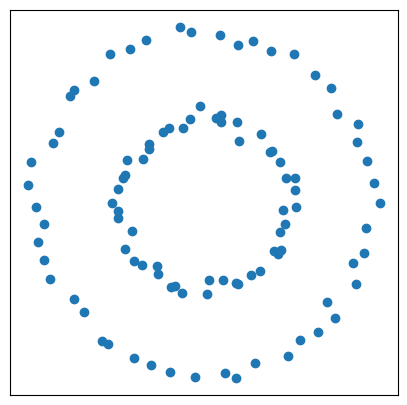

In [ ]:
X, y = make_circles(n_samples=100, noise=0.03, factor=0.5)
fig = plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

Please pay attention to this statment in scikit-learn [documentation](https://scikit-learn.org/stable/modules/neighbors.html#neighbors-transformer)

> In `KNeighborsTransformer` we use the definition which includes each training point as its own neighbor in the count of `n_neighbors`.

Therefore, we have to add `+1` when passing a number to `n_neighbors`, because the first neighbor is the point itself.

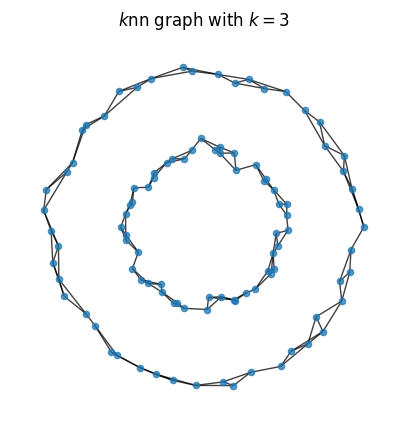

In [ ]:
k = 3
nbrs = KNeighborsTransformer(n_neighbors=k+1, mode='connectivity', algorithm='kd_tree')
X_dist_graph = nbrs.fit_transform(X)
X_dist_graph.setdiag(0)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
G1 = nx.from_numpy_array(X_dist_graph)
nx.draw(G1, X, node_size=20, alpha=0.75)
ax.set_title('$k$nn graph with $k=3$')
ax.set_axis_off()

Let's try a number of values for the $k$-nn graph.

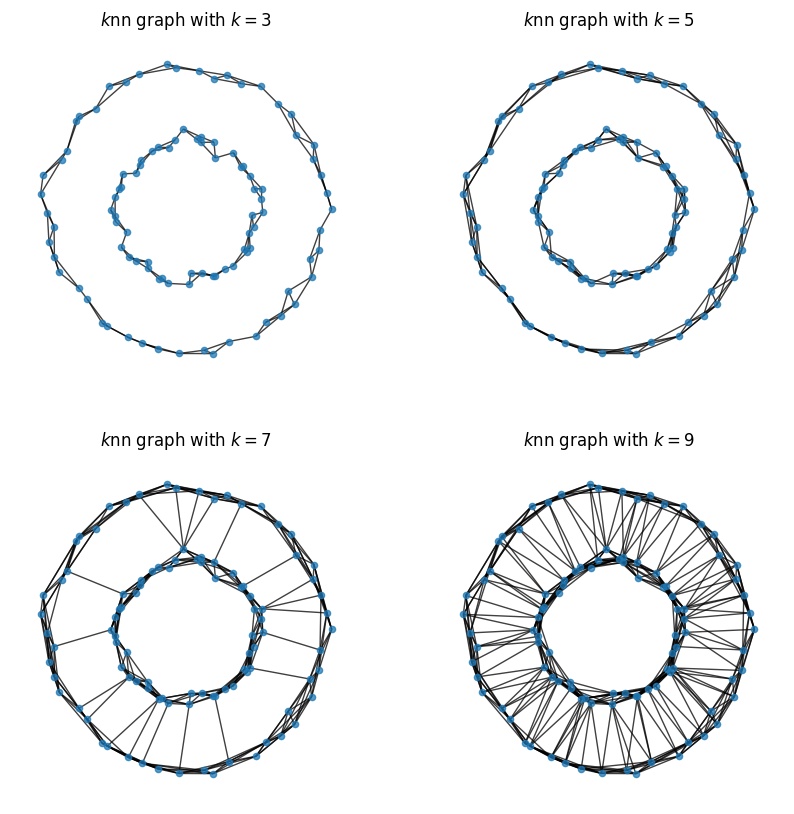

In [ ]:
fig = plt.figure(figsize=(10, 10))

k_values = [3, 5, 7, 9]
plt_counter = 0
for k in k_values:
  nbrs = KNeighborsTransformer(n_neighbors=k+1, mode='connectivity', algorithm='kd_tree')
  X_dist_graph = nbrs.fit_transform(X)
  X_dist_graph.setdiag(0)

  plt.subplot(2,2,plt_counter+1)
  G1 = nx.from_numpy_array(X_dist_graph)
  nx.draw(G1, X, node_size=20, alpha=0.75)
  plt.title('$k$nn graph with $k=$'+str(k))
  plt_counter += 1


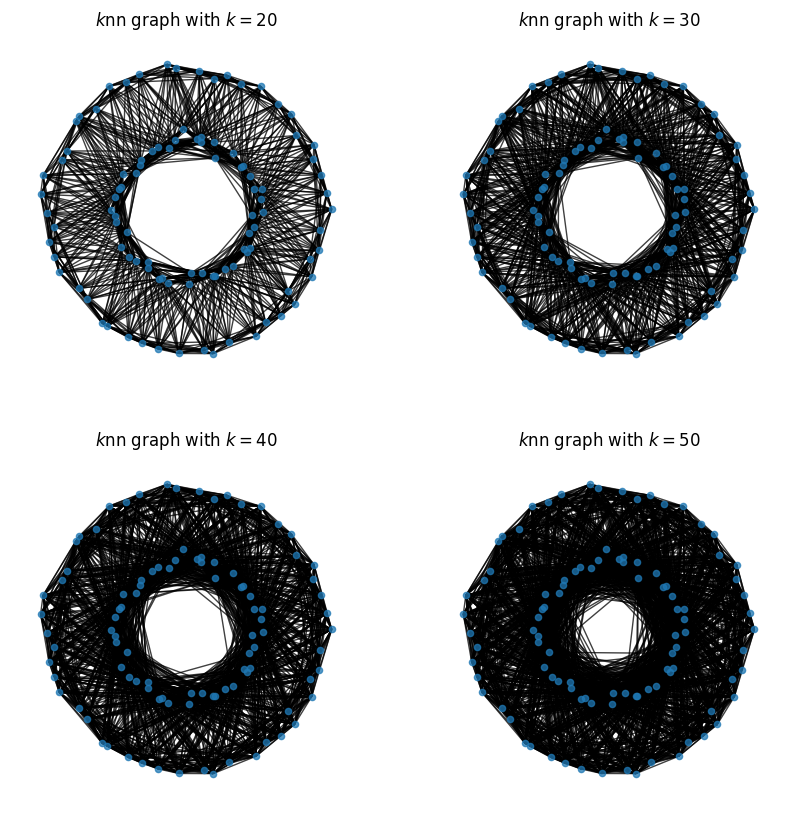

In [ ]:
fig = plt.figure(figsize=(10, 10))

k_values = [20, 30, 40, 50]
plt_counter = 0
for k in k_values:
  nbrs = KNeighborsTransformer(n_neighbors=k+1, mode='connectivity', algorithm='kd_tree')
  X_dist_graph = nbrs.fit_transform(X)
  X_dist_graph.setdiag(0)

  plt.subplot(2,2,plt_counter+1)
  G1 = nx.from_numpy_array(X_dist_graph)
  nx.draw(G1, X, node_size=20, alpha=0.75)
  plt.title('$k$nn graph with $k=$'+str(k))
  plt_counter += 1

In [ ]:
!jupyter nbconvert --to html /content/knn_graph.ipynb

[NbConvertApp] Converting notebook /content/knn_graph.ipynb to html
[NbConvertApp] Writing 1601696 bytes to /content/knn_graph.html
